In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.linalg import expm

### Question 1

In [2]:
def f(x,c):
    x,y = c
    dx =  3*x -  2*y
    dy =  2*x - 2*y
    return np.array([dx,dy])

gx = lambda t:(4/3) *(np.exp(2*t)) - (1/3) * np.exp(-t)
gy = lambda t: (2/3)* np.exp(2 * t) - (2/3) * np.exp(-t)


In [3]:
 def RK2OdeSys(f,c,t):
    
    h = t[1] - t[0]
    
    N = len(t)
    
    z = np.zeros((N,len(c)))
    z[0] = c
    
    for n in range(0,N-1):
        k1 = h *f(t[n],z[n])
        k2 =  h * f(t[n] + h, z[n] + k1)
        z[n+1] =  z[n] + (1/2) *(k1 + k2)
    return z

In [4]:
h = 0.01
t =  np.arange(0,1,h)

z0 = np.array([1,0])
A  = np.array([[3,-2],[2,-2]])

z_actual_gx =  gx(t)
z_actual_gy =  gy(t)

z_rk_2 =  RK2OdeSys(f,z0,t)


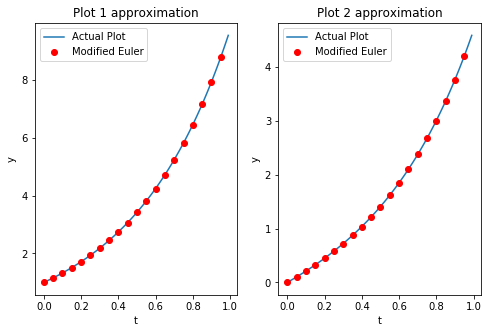

In [5]:
fig = plt.figure(1,figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(t,z_actual_gx)
plt.plot(t[::5],z_rk_2[:,0][::5],"ro")
plt.title("Plot 1 approximation")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Actual Plot","Modified Euler"])


plt.subplot(1,2,2)
plt.plot(t,z_actual_gy)
plt.plot(t[::5],z_rk_2[:,1][::5],"ro")
plt.title("Plot 2 approximation")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Actual Plot","Modified Euler"])
plt.show()

### Question 2

In [6]:
def expoTimeDiff(h,A,c,t):
    N = len(t)
    
    z = np.zeros((N,len(c)))
    z[0] = c

    for n in range(0,N-1):
        z[n+1] =  expm(h * A ) @ z[n]
    return z

In [7]:
expoTimeDiff_result  = expoTimeDiff(h,A,z0,t)

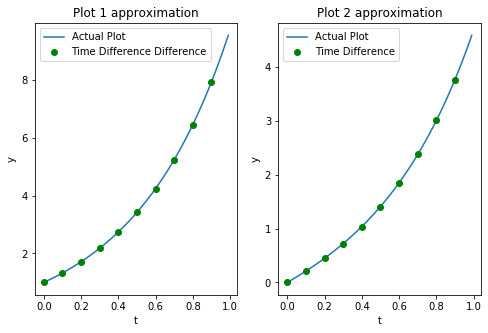

In [9]:
fig = plt.figure(1,figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(t,z_actual_gx)
plt.plot(t[::10],expoTimeDiff_result[:,0][::10],"go")
plt.title("Plot 1 approximation")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Actual Plot","Time Difference Difference"])



plt.subplot(1,2,2)
plt.plot(t,z_actual_gy)
plt.plot(t[::10],expoTimeDiff_result[:,1][::10],"go")
plt.title("Plot 2 approximation")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Actual Plot","Time Difference"])
plt.show()

### Question 3

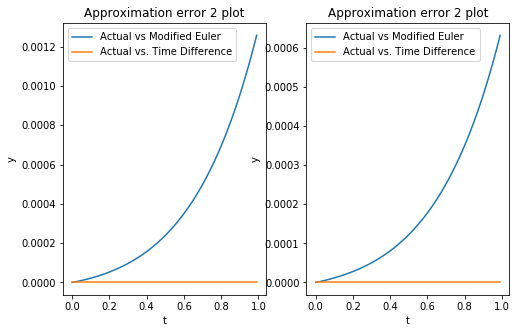

In [10]:
fig = plt.figure(1,figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(t,abs(z_actual_gx - z_rk_2[:,0]))
plt.plot(t,abs(z_actual_gx - expoTimeDiff_result[:,0]))
plt.title("Approximation error 2 plot")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Actual vs Modified Euler","Actual vs. Time Difference"])




plt.subplot(1,2,2)
plt.plot(t,abs(z_actual_gy - z_rk_2[:,1]))
plt.plot(t,abs(z_actual_gy - expoTimeDiff_result[:,1]))
plt.title("Approximation error 2 plot")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Actual vs Modified Euler","Actual vs. Time Difference"])
plt.show()

The exponential time differencing scheme is better at approximating the system of ODE compared to the modified Euler Method. The Exponential Time Difference Method has a constant error as show in figure (1) and (2) as compared to Modified Euler Method.